* Name :Altun Keskin
* Data Analyses
    

* Find the attached file of World population, 
* Find out missing or invalid values, handle them using one of the known techniques [mean, mode, forward backward filling]
* Describe the top 10 countries by populations and visualize in both pie and bar plots. 
* Describe the last 10 countries by fertilization rate and visaulize them. 


In [1]:
# Let's start by importing the libraries we will be using
# data analysis
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:

df= pd.read_csv('world_population.csv')
df.head(1)


,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    object 
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    object 
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    object 
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


In [3]:
data =df.copy()
data.head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2,34,26.0
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0
6,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0
9,Austria,9006398,0.57,51296,109,82409,65000,1.5,43,57.0


In [7]:
# I encountered syntex problems while following the instructions. So I renamed some columns.
# remove extra symbol
data['Density (P/Km²)'] = data['Density (P/Km²)'].replace(',','')


In [8]:
# rename columns
data.rename(columns={'Urban Pop %': 'UrbanPop','Country/Other':'Country','Population (2020)':'Population'}, inplace=True)
data.head(1)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0


In [9]:
#data['Density (P/Km²)'] = data['Density (P/Km²)'].astype(int)
data['Country'] = data['Country'].astype(str)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          201 non-null    object 
 1   Population       201 non-null    int64  
 2   Yearly Change    201 non-null    float64
 3   Net Change       201 non-null    object 
 4   Density (P/Km²)  201 non-null    int64  
 5   Land Area (Km²)  201 non-null    object 
 6   Migrants (net)   201 non-null    int64  
 7   Fert. Rate       201 non-null    object 
 8   Med. Age         201 non-null    int64  
 9   UrbanPop         194 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


In [11]:
data.shape

(201, 10)

In [12]:
#towardsdatascience.com/analysing-and-visualising-the-country-wise-population-from-1955-to-2020-with-pandas-matplotlib-70b3614eed6b

In [13]:
data.describe()

,Population,Yearly Change,Density (P/Km²),Migrants (net),Med. Age,UrbanPop
count,2.010000e+02,201.000000,201.000000,201.000000,201.000000,194.000000
mean,3.877661e+07,1.200299,361.711443,-5.442786,30.621891,59.634021
std,1.454245e+08,1.091574,1710.321831,123292.057588,9.119557,22.226695
min,9.792900e+04,-2.470000,2.000000,-653249.000000,15.000000,13.000000
25%,1.886198e+06,0.420000,34.000000,-10047.000000,22.000000,43.000000
50%,8.654622e+06,1.080000,89.000000,-960.000000,30.000000,60.000000
75%,2.769102e+07,1.960000,228.000000,9741.000000,39.000000,78.750000
max,1.439324e+09,3.840000,21645.000000,954806.000000,48.000000,100.000000


* https://sparkbyexamples.com/pandas/pandas-sum-dataframe-columns/#:~:text=sum()%20to%20Sum%20All,which%20means%20summing%20of%20rows.
#### Find the attached file of World population,

In [14]:
Pop_sum= ["Population"]
sum= data[Pop_sum].sum()
print(sum)

Population    7794099349
dtype: int64


In [78]:
# Find out missing or invalid values, handle them using one of the known techniques [mean, mode, forward backward filling]

In [15]:
total =data.isnull().sum().sort_values(ascending =False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_df =pd.concat([total,percent],axis =1,join ='outer',keys =['Total Missing','% of missing'])

missing_df

,Total Missing,% of missing
UrbanPop,7,0.034826
Med. Age,0,0.000000
Fert. Rate,0,0.000000
Migrants (net),0,0.000000
Land Area (Km²),0,0.000000
Density (P/Km²),0,0.000000
Net Change,0,0.000000
Yearly Change,0,0.000000
Population,0,0.000000
Country,0,0.000000


In [16]:
data.isnull().sum()


Country            0
Population         0
Yearly Change      0
Net Change         0
Density (P/Km²)    0
Land Area (Km²)    0
Migrants (net)     0
Fert. Rate         0
Med. Age           0
UrbanPop           7
dtype: int64

In [17]:
data.isnull().sum().any()

True

In [18]:
data.isnull().any()

Country            False
Population         False
Yearly Change      False
Net Change         False
Density (P/Km²)    False
Land Area (Km²)    False
Migrants (net)     False
Fert. Rate         False
Med. Age           False
UrbanPop            True
dtype: bool

In [19]:
data.UrbanPop.fillna(value =data.UrbanPop .mean(),inplace=True)


In [20]:
data.isnull().any()

Country            False
Population         False
Yearly Change      False
Net Change         False
Density (P/Km²)    False
Land Area (Km²)    False
Migrants (net)     False
Fert. Rate         False
Med. Age           False
UrbanPop           False
dtype: bool

### Describe the top 10 countries by populations and visualize in both pie and bar plots.


In [85]:
data.head(1)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0


In [86]:
#https://datascientyst.com/get-top-10-highest-lowest-values-pandas/

In [90]:
data['Population'].nlargest(n=10)

36     1439323776
82     1380004385
191     331002651
83      273523615
136     220892340
23      212559417
131     206139589
13      164689383
147     145934462
116     128932753
Name: Population, dtype: int64

### A pie chart shows how some total amount is divided among distinct categories as a circle (the namesake pie) divided into radial slices. Each category is associated with a single slice whose size corresponds with the category’s proportion of the total.

In [1]:
fig = px.pie(data, values='Population', names='Country')
fig.show()

NameError: name 'px' is not defined

### A bar chart depicts numeric values against distinct categories in a two-axis plot. On one axis, the category levels are listed. For each category, one bar is plotted, and its length along the other axis corresponds with the numeric value associated with the category.

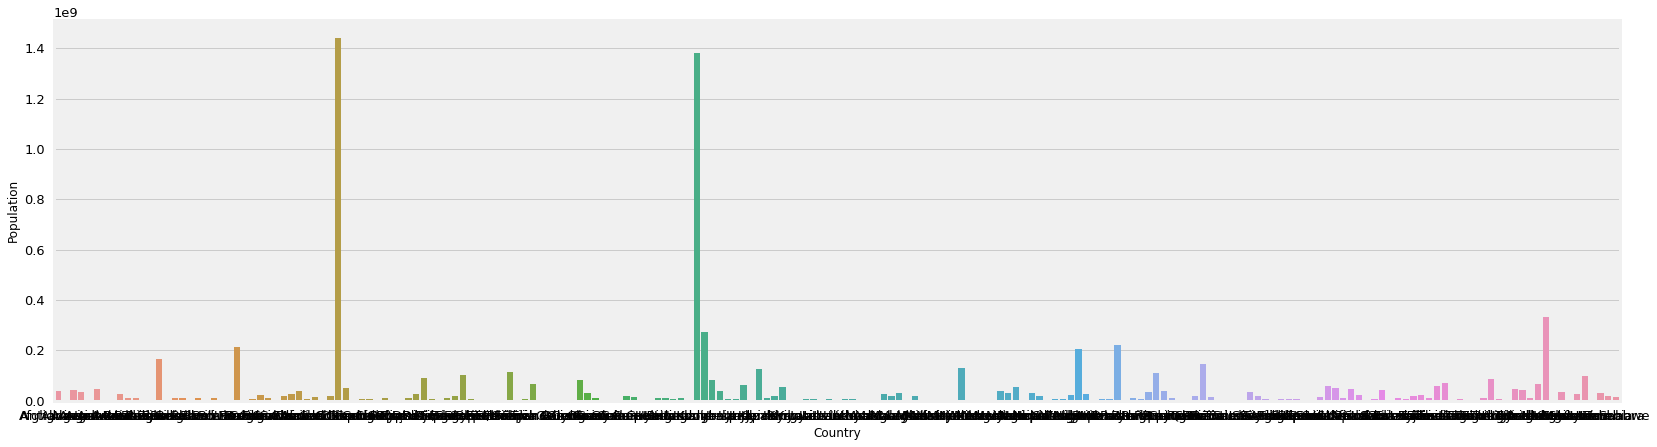

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'Country',y = 'Population',data = data)
plt.show()

In [22]:
pop_20=data.sort_values("Population",ascending =False)
pop_20


,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0
...,...,...,...,...,...,...,...,...,...,...
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0
181,Tonga,105695,1.15,1201,147,720,-800,3.6,22,24.0
186,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2,43,96.0
156,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56.0


In [25]:
# 1- We are sorting the dataset by populations Descending.
# 2- Reset index.
# 3- Get the first 10
top_ten = data.sort_values('Population', ascending=False).reset_index(drop=True).head(10)
top_ten 

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0
5,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0
6,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0
7,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0
8,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0
9,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0


In [26]:
top_ten.describe()

,Population,Yearly Change,Density (P/Km²),Migrants (net),Med. Age,UrbanPop
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.503002e+08,1.045000,268.200000,-54445.900000,30.500000,60.700000
std,5.092752e+08,0.747221,377.450747,412159.180568,6.964194,20.688429
min,1.289328e+08,0.040000,9.000000,-532687.000000,18.000000,35.000000
25%,1.750519e+08,0.622500,43.500000,-319644.000000,28.000000,42.250000
50%,2.167259e+08,1.000000,152.000000,-79477.500000,29.500000,58.500000
75%,3.166329e+08,1.067500,271.750000,900.000000,36.750000,80.750000
max,1.439324e+09,2.580000,1265.000000,954806.000000,40.000000,88.000000


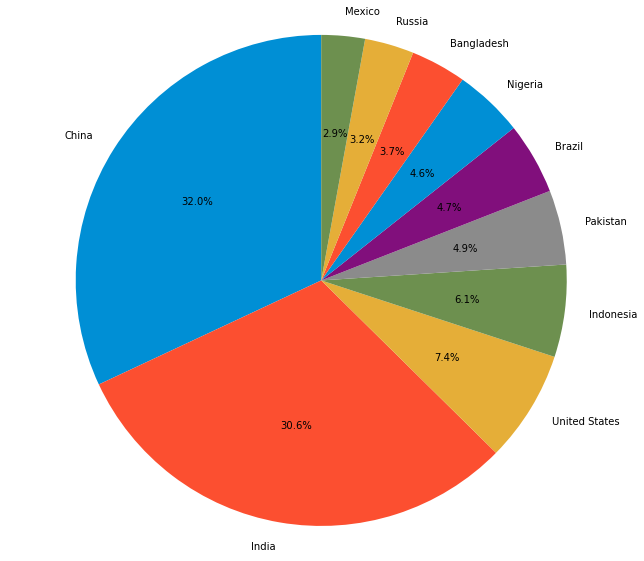

In [27]:
# Pie chart, 
labels = top_ten['Country']
sizes = top_ten['Population']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

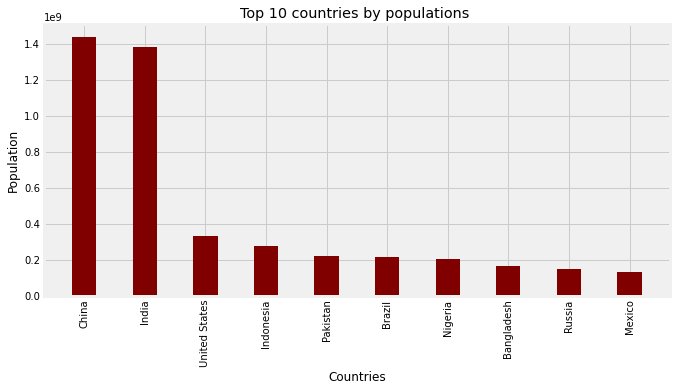

In [29]:
# Bar Chart
c_name = top_ten['Country']
c_pop = top_ten['Population']

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(c_name, c_pop, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("Top 10 countries by populations ")
plt.show()

* https://towardsdatascience.com/analysing-and-visualising-the-country-wise-population-from-1955-to-2020-with-pandas-matplotlib-70b3614eed6b

### Describe the last 10 countries by fertilization rate and visaulize them.

In [46]:
# 1- We are sorting the dataset by fertilization rate ascending.
# 2- Reset index.
# 3- Get the first 10
last_ten_by_fertil = data.sort_values('Fert. Rate').reset_index(drop=True).tail(10)
last_ten_by_fertil

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
191,Gambia,2416668,2.94,68962,239,10120,-3087,5.3,18,59.0
192,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0
193,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0
194,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0
195,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0
196,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0
197,DR Congo,89561403,3.19,2770836,40,2267050,23861,6,17,46.0
198,Somalia,15893222,2.92,450317,25,627340,-40000,6.1,17,47.0
199,Niger,24206644,3.84,895929,19,1266700,4000,7,15,17.0
200,Czech Republic (Czechia),10708981,0.18,19772,139,77240,22011,NAN,43,74.0


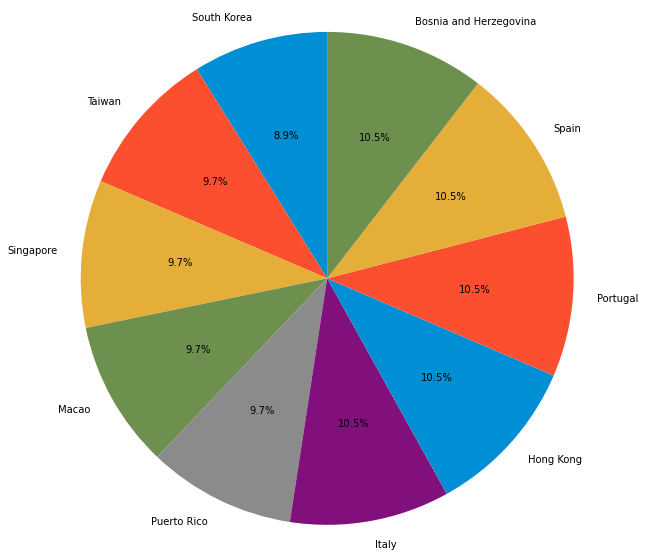

In [51]:
# Pie chart, 
labels = last_ten_by_fertil['Country']
sizes = last_ten_by_fertil['Fert. Rate']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
# 1- We are sorting the dataset by fertilization rate ascending.
# 2- Reset index.
# 3- Get the first 10
top_ten_by_fertil = data.sort_values('Fert. Rate').reset_index(drop=True).head(10)
top_ten_by_fertil

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,UrbanPop
0,South Korea,51269185,0.09,43877,527,97230,11731,1.1,44,82.000000
1,Taiwan,23816775,0.18,42899,673,35410,30001,1.2,42,79.000000
2,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,59.634021
3,Macao,649335,1.39,8890,21645,30,5000,1.2,39,59.634021
4,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986,1.2,44,59.634021
5,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.000000
6,Hong Kong,7496981,0.82,60827,7140,NAN,29308,1.3,45,59.634021
7,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66.000000
8,Spain,46754778,0.04,18002,94,498800,40000,1.3,45,80.000000
9,Bosnia and Herzegovina,3280819,-0.61,-20181,64,51000,-21585,1.3,43,52.000000


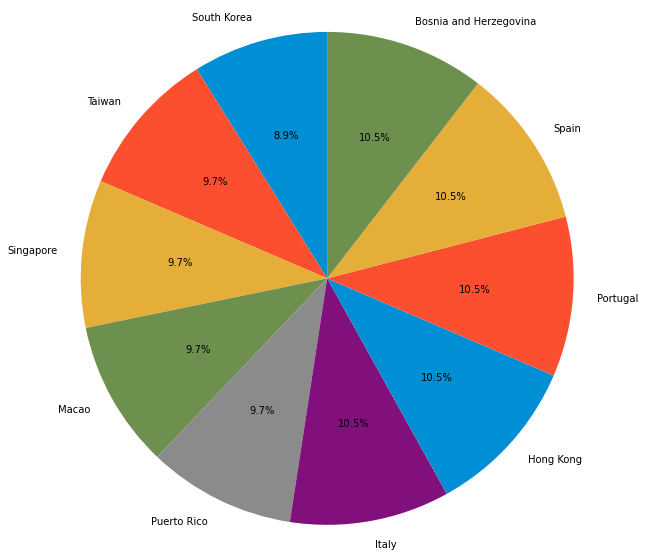

In [54]:
# Pie chart, 
labels = top_ten_by_fertil['Country']
sizes = top_ten_by_fertil['Fert. Rate']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

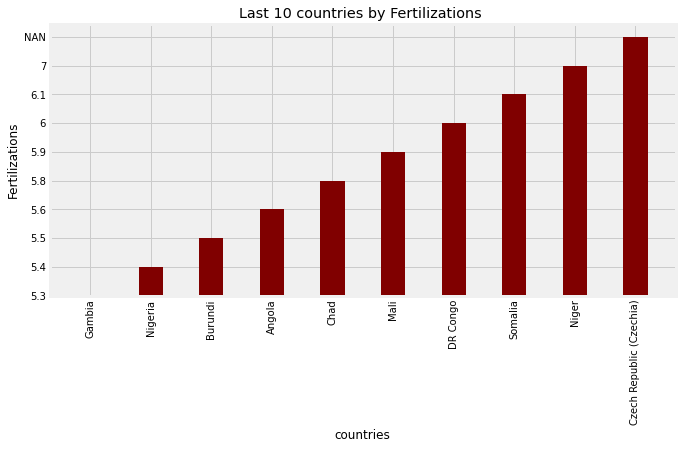

In [43]:
# Bar Chart
c_name = last_ten_by_fertil['Country']
c_pop = last_ten_by_fertil['Fert. Rate']

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(c_name, c_pop, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("countries")
plt.ylabel("Fertilizations")
plt.title("Last 10 countries by Fertilizations ")
plt.show()